In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import scipy

In [3]:
datapath = '/home/brian/WesternWheat/Data/Processed/stripped_mini_maxseason_labeled_df_23.csv'
#datapath = '/home/brian/WesternWheat/Data/Processed/stripped_max_labeled_df_23.csv'
#datapath = '/home/brian/WesternWheat/Data/Processed/maxdf_23.csv'

df = pd.read_csv(datapath)
Num_farms = pd.unique(df.pixel).size
print ('there are {} unique farms in loaded df'.format(Num_farms))
df_unique =  df.set_index('pixel')
df_unique = df_unique[~df_unique.index.duplicated(keep='first')] # only keep unique index value

farm_idx = df.pixel.values.astype(int)
N_farms = pd.unique(df.pixel).size
#====================================
# reindexing pixels from 0-Nfarms
#====================================
zero_farm_idx = np.zeros_like(farm_idx)

for i,farm in enumerate((np.unique(farm_idx))):
        for j in np.where(farm_idx == farm): 
            zero_farm_idx[j] = int(i)   
            
##########################################################
# This keeps order only becuase df is sorted by farm_idx
#########################################################
df['farm'] = zero_farm_idx

there are 164 unique farms in loaded df


In [4]:
###########################
# ==== distance matrix ====
###########################

from scipy.spatial import distance_matrix
from geopy.distance import geodesic

    

def distancematrix(df, distance_calc=True, sparse=True, dlim=100):
    unique_farms = pd.unique(df.pixel)
    distance = np.zeros((unique_farms.size,unique_farms.size))
    df_unique = df.set_index('pixel')
    df_unique = df_unique[~df_unique.index.duplicated(keep='first')] # only keep unique index values

    for i in range(unique_farms.size):
        lat_lon_i = df_unique.Latitude.iloc[i],df_unique.Longitude.iloc[i]
        for j in range(unique_farms.size):
            lat_lon_j = df_unique.Latitude.iloc[j],df_unique.Longitude.iloc[j]
            if distance_calc == True:
                distance[i,j] = geodesic(lat_lon_i, lat_lon_j).miles
            if sparse == True and distance[i,j]>dlim:
                distance[i,j] = np.NaN
    return distance


distance = distancematrix(df, distance_calc=True, sparse=False, dlim=75)

Dmatsq = np.power(distance, 2)

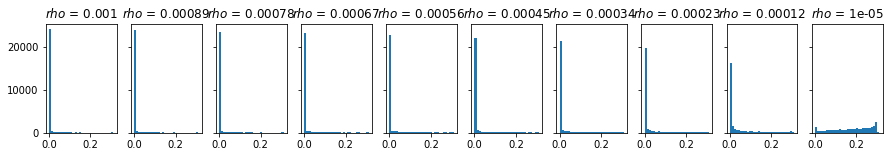

In [5]:
n=10
k = np.zeros([n])
etas = np.linspace(0,1,10)
rhos = np.logspace(-3.8,-4.9,n)
rhos = np.linspace(1e-3,1e-5,n)
sigmay = .01
etasq = .3
fig,ax = plt.subplots(1,n,figsize=(n*1.5,2),sharey=True)
for j, rhosq in enumerate(rhos):
    Kij = etasq*(np.exp(-rhosq*Dmatsq))+np.diag([sigmay]*Num_farms)
    #sns.kdeplot(data=np.ravel(Kij),ax=ax[j])
    ax[j].hist(np.ravel(Kij),bins=30)
    ax[j].set_title(r'$rho$ = {}'.format(round(rhosq,6)))
   

0.5365853658536586 2.048780487804878 2.9146341463414633 109.15853658536585


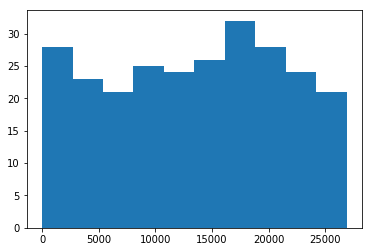

In [23]:

etasq= 1
rhosq = 1e-2
Kij = etasq*(np.exp(-rhosq*Dmatsq))+np.diag([sigmay]*Num_farms)
k = np.ravel(Kij)
b = etasq/2
p = .05
l = .01
#sns.heatmap(Kij);
#print (np.nonzero(np.ravel(Kij)).size/175)
N0 = (np.nonzero(k)[0].size-Num_farms)/Num_farms
Nb = (np.argwhere(k>b).size - Num_farms) / Num_farms
Np = (np.argwhere(k>p).size - Num_farms) / Num_farms
Nl = (np.argwhere(k>l).size - Num_farms) / Num_farms
print (Nb,Np, Nl, N0)
#plt.hist(np.ravel(Kij),bins=80);
plt.hist(np.argwhere(k>b));

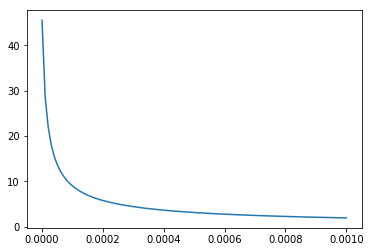

In [7]:
rhosq = np.linspace(1e-3,1e-6, 100)
k = []
for r in rhosq:
    K = etasq*(np.exp(-r*Dmatsq))+np.diag([sigmay]*Num_farms)
    k.append(np.sum(K))
plt.plot(rhosq,np.array(k)/Num_farms);